<h1 align='center'> Opening a Restaurant in Attica, Greece</h1>

<h2 align='center'> Introduction</h2>

The following analysis is performed to determined the suitable municipalities in Attica, Greece for openi a new restaurant. We will be using the Foursquare Places API to get the venues in each municipality and cluster them in groups consisting of similar venues. Then by analyzing the average property rent and sale cost for each municipality we will propose the most suitable municipalities to open the restaurant.

<h2 align='center'>Datasets</h2>

The following datasets were used:

1. Attica Municipalities - web-scrapped from [wikipedia](https://en.wikipedia.org/wiki/Category:Municipalities_of_Attica)
2. Venues per Municipality - [Foursquare Places API ](https://developer.foursquare.com/places)
3. Financial Data for Property Rentals/Sales - Web scrapped from [spitogatos.gr](https://en.spitogatos.gr/property-index)
4. Greek Municipalities Boundaries GeoJSON - [Geodata.gov.gr](https://geodata.gov.gr/en/dataset/oria-demon-kallikrates)


<h2 align='center'>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Municipalities of Attica Dataset](#attica_municipalities)<br>
2. [Municipalities Clustering](#clustering)<br>
3. [Property Pricing in Attica Municipalities](#property_pricing) <br>
4. [Property Prices Visualization](#price_visualization) <br>
5. [Discussion](#discuassion) <br>
</div>
<hr>

<h2 align='center'>Municipalities of Attica <a id="attica_municipalities"></a></h2>

We first need to import all necessary python libraries for performing the analysis 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# import the library we use to open URLs
import urllib.request as rqst

# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup as BSoup

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

print('Pandas version: ', pd.__version__)
print('Numpy version: ', np.__version__)
print('Urllib Request version: ', rqst.__version__)
print("BeautifulSoup imported!")

Pandas version:  0.25.3
Numpy version:  1.18.1
Urllib Request version:  3.7
BeautifulSoup imported!


<h3>Perform Web Scrapping to get the Data</h3>

The data is not readily available as a dataset so we are going to use Web Scrapping techniques to get the Municipalities of Attica. The links of all municipality pages is contained in this [Wikipedia page](https://en.wikipedia.org/wiki/Category:Municipalities_of_Attica). The coordinates data will be acquired from each municipality's wikipedia page using the following fully automated process.

**You can use the already downloaded data by skipping the web scraping to [_here_](#mun_coord_csv)**

<h4>Download wikipedia page contents</h4>

In [2]:
# specify which URL/web page we are going to be scraping
url = "https://en.wikipedia.org/wiki/Category:Municipalities_of_Attica"

In [3]:
# open the url using urllib.request and put the HTML into the page variable
list_page = rqst.urlopen(url)

In [4]:
# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BSoup(list_page, "lxml")

In [5]:
# Get the title of the webpage as a string
soup.title.string

'Category:Municipalities of Attica - Wikipedia'

<h4>Find the div containing all municipalities' links</h4>

In [6]:
# Get the all links of the specified div
all_links_div = soup.find("div", {"id": "mw-pages"})
# Verify that we got the correct div by printing the title
all_links_div.find("h2").getText()

'Pages in category "Municipalities of Attica"'

In [7]:
# Get all list items that contain the links we need
mun_list_items = all_links_div.findAll('li')
# Get all links for Municipalities and save in a list
mun_links = []
# List of municipalities out of Attica mainland that we do not need for this analysis
mun_to_remove = ['Aegina', 'Agistri', 'Kythira', 'Salamis_Island',  'Troizinia-Methana', 'Hydra_(island)', 'Spetses' ]
for li in mun_list_items:
    # Remove the municipalities not needed     
    if any(mun in li.a['href'] for mun in mun_to_remove):
        continue
    mun_links.append('https://en.wikipedia.org' + li.a['href'])

print("Municipalities found: ", len(mun_links))

Municipalities found:  56


In [8]:
# Function to get coordinates from Wikipedia page

def getWikiCoord(soupTree):
    latitude = None;
    longitude = None;
    if soupTree.find('table',{'class': 'geography'}):
        table = soupTree.find('table',{'class': 'geography'})
        if table.find('span',{"class": "latitude"}) and table.find('span',{"class": "longitude"}):
            latitude = table.find('span',{"class": "latitude"}).getText()
            longitude = table.find('span',{"class": "longitude"}).getText()
    elif soupTree.find('table',{'class': 'vcard'}):
        table = soupTree.find('table',{'class': 'vcard'})
        if table.find('span',{"class": "latitude"}) and table.find('span',{"class": "longitude"}):
            latitude = table.find('span',{"class": "latitude"}).getText()
            longitude = table.find('span',{"class": "longitude"}).getText()
    if latitude == None and longitude == None:
        print('Coordinates not found')
    else:
        print('lat: ', latitude)
        print('lon: ', longitude)
    coordinates = [latitude,longitude]
    return coordinates

In [9]:
# time library needed for sleeping between webpage connections to avoid ip blacklisting
import time
import random

# Get each municipality's wike page, find the coordinates and save them in a list
municipalities_list = []
for url in mun_links:
    
    current_municipality = []
    page=rqst.urlopen(url)
    # parse the HTML from our URL into the BeautifulSoup parse tree format
    soup = BSoup(page, "lxml")
    # Get the name of the neighborhood
    municipality_name = soup.title.string.split(' - ')[0]
    current_municipality.append(municipality_name)
    print(municipality_name)
    #Get the coordinates of the neighborhood
    current_municipality.extend(getWikiCoord(soup))
    municipalities_list.append(current_municipality)
    # Sleep to avoid ip blacklisting     
    time.sleep(random.randint(0, 3))
    print('')

print(len(municipalities_list))

Acharnes
lat:  38°5′N
lon:  23°44′E

Agia Paraskevi
lat:  38°0.7′N
lon:  23°49.2′E

Agia Varvara
lat:  38°00′N
lon:  23°39′E

Agioi Anargyroi-Kamatero
lat:  38°02′N
lon:  23°43′E

Agios Dimitrios
lat:  37°56′N
lon:  23°44′E

Aigaleo
lat:  37°59′31″N
lon:  23°40′41″E

Alimos
lat:  37°55′N
lon:  23°43′E

Aspropyrgos
lat:  38°4′N
lon:  23°35′E

Chalandri
lat:  38°1′N
lon:  23°48′E

Dafni-Ymittos
lat:  37°57′N
lon:  23°43′E

Dionysos, Greece
lat:  38°6′N
lon:  23°52′E

Eleusis
lat:  38°2′N
lon:  23°32′E

Elliniko-Argyroupoli
lat:  37°54′N
lon:  23°45′E

Filadelfeia-Chalkidona
lat:  38°02′N
lon:  23°42′E

Filothei-Psychiko
lat:  38°01′N
lon:  23°46′E

Fyli
lat:  38°6′N
lon:  23°40′E

Galatsi
lat:  38°01′N
lon:  23°45′E

Glyfada
lat:  37°52′N
lon:  23°45′E

Haidari
lat:  38°1′N
lon:  23°39′E

Ilion, Greece
lat:  38°2′N
lon:  23°42′E

Ilioupoli
lat:  37°56′N
lon:  23°45′E

Irakleio, Attica
lat:  38°3′N
lon:  23°46′E

Kaisariani
lat:  37°58.1′N
lon:  23°45.5′E

Kallithea
lat:  37°57′N
lon:  23

<h4>Load data in a dataframe and clean them up</h4>

In [10]:
# Convert List to Dataframe
pd.set_option('display.max_rows', None)  
mun_columns = ['Municipality', 'Latitude','Longitude']
mun_df = pd.DataFrame(municipalities_list, columns = mun_columns) 
mun_df.head()

Municipality  Latitude  Longitude
0                  Acharnes    38°5′N    23°44′E
1            Agia Paraskevi  38°0.7′N  23°49.2′E
2              Agia Varvara   38°00′N    23°39′E
3  Agioi Anargyroi-Kamatero   38°02′N    23°43′E
4           Agios Dimitrios   37°56′N    23°44′E

In [11]:
# Manually adding Athens coordinates which is missing from wikipedia page
mun_df = mun_df.append({'Municipality': 'Athina', 'Latitude': '37°59′N', 'Longitude':'23°44′E'}, ignore_index=True)
mun_df.tail()

Municipality   Latitude  Longitude
52  Vari-Voula-Vouliagmeni    37°51′N    23°45′E
53               Vrilissia     38°2′N    23°50′E
54                 Vyronas  37°57.7′N  23°45.2′E
55                Zografou  37°58.7′N  23°46.3′E
56                  Athina    37°59′N    23°44′E

In [12]:
mun_df.shape

(57, 3)

<h3 >Dataset cleanup</h3>

In [13]:
#  Find None values
mun_df[mun_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Municipality, Latitude, Longitude]
Index: []

Great! No None values found. We can now move on to convert the coordinates to a format we can use in Foursquare API.

In [14]:
# Function Convert Coordinate format from DDM (Degree,Decimal Minutes) to Decimal
"""
Converting Degrees, Decimal Minutes formatted coordinate strings to decimal. 
Formula:
DEC = (DEG + (MIN * 1/60))
Assumes S/W are negative. 
"""

import re

def ddm2dec(dms_str):
    
    dms_str = re.sub(r'\s', '', dms_str)
    
    sign = -1 if re.search('[swSW]', dms_str) else 1
    
    numbers = [*filter(len, re.split('\D+', dms_str, maxsplit=4))]

    degree = numbers[0]
    minute = numbers[1] if len(numbers) >= 2 else '0'
    frac_minutes = numbers[2] if len(numbers) >= 3 else '0'
    
    minute += "." + frac_minutes
    return sign * (int(degree) + float(minute) / 60)

In [15]:
# Applying coordinate transformation function to Latitude and Longitude values of the dataset
mun_df['Latitude'] = mun_df['Latitude'].apply(ddm2dec)
mun_df['Longitude'] = mun_df['Longitude'].apply(ddm2dec)
mun_df.head()

Municipality   Latitude  Longitude
0                  Acharnes  38.083333  23.733333
1            Agia Paraskevi  38.011667  23.820000
2              Agia Varvara  38.000000  23.650000
3  Agioi Anargyroi-Kamatero  38.033333  23.716667
4           Agios Dimitrios  37.933333  23.733333

In [16]:
# Convert List to Dataframe
pd.set_option('display.max_rows', None)  
print(mun_df.shape)
mun_df.head()

(57, 3)


Municipality   Latitude  Longitude
0                  Acharnes  38.083333  23.733333
1            Agia Paraskevi  38.011667  23.820000
2              Agia Varvara  38.000000  23.650000
3  Agioi Anargyroi-Kamatero  38.033333  23.716667
4           Agios Dimitrios  37.933333  23.733333

<h4>Use csv data instead<a id='mun_coord_csv'></a></h4>

In [17]:
# Uncomment to use the csv file containing the Municipalities and their coordinates 

# mun_df = pd.read_csv("./attica_municipalities_dec.csv")
# print(mun_df.shape)
# mun_df.head()

<h2 align=center>Municipalities Clustering<a id= "clustering"></a></h2>

<h3 align='center'>Visualizing Municipalities</h3>

Import python libraries to visualize the data to a map

In [18]:
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 
# map rendering library
import folium 

In [19]:
# Get the coordinates of Attica using geocoder. We need them to cunstruct the map
address = 'Attica, GR'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Athens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Athens are 37.9946543, 23.79940251269328.


In [20]:
# create map of Attica using latitude and longitude values
map_attica = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map for each Municipality
for lat, lng, municipality in zip(mun_df['Latitude'], mun_df['Longitude'], mun_df['Municipality']):
    label = '{}'.format(municipality)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FF0000',
        fill_opacity=0.7,
        parse_html=False).add_to(map_attica)  
    
map_attica

<hr>

<h3 align='center'>Foursquare API</h3>

In [21]:
# Needed to get API credentials from Environmnent Variables
import os
# library to handle requests
import requests 

**You can use the already downloaded data by skipping the Foursquare API calls through [_here_](#foursquare_csv)**

In [113]:
# Foursquare credentials
# The dataset is also provided as a csv, if you don't want to provide API credentials
CLIENT_ID = os.environ.get("FRSQ_API_CLIENT_ID")
CLIENT_SECRET = os.environ.get("FRSQ_API_CLIENT_SECRET")
VERSION = '20180605' # Foursquare API version
LIMIT = 100

# print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)

In [114]:
# Fuction to get newarby venues
def getNearbyVenues(names, latitudes, longitudes, radius=1200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Municipality', 
                  'Municipality Latitude', 
                  'Municipality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
# Get venues for all neighborhoods by calling the aboce function
attica_venues = getNearbyVenues(names=mun_df['Municipality'],
                                   latitudes=mun_df['Latitude'],
                                   longitudes=mun_df['Longitude']
                                  )

<h4>Use CSV data instead<a id='foursquare_csv'></a></h4>

In [136]:
# Uncomment if you want to get the values from the csv file instead of the Foursquare API
# attica_venues = pd.read_csv("./attica_venues.csv")

In [137]:
# Take a look on results
print(attica_venues.shape)
attica_venues.head()

(3893, 7)


Municipality  Municipality Latitude  Municipality Longitude  \
0     Acharnes              38.083333               23.733333   
1     Acharnes              38.083333               23.733333   
2     Acharnes              38.083333               23.733333   
3     Acharnes              38.083333               23.733333   
4     Acharnes              38.083333               23.733333   

              Venue  Venue Latitude  Venue Longitude   Venue Category  
0          Lemonia'       38.080645        23.736461             Café  
1   YOU N•A•I•L•S        38.081396        23.737528   Cosmetics Shop  
2      Κρητικοπούλα       38.088760        23.732580  Meze Restaurant  
3  Bartist Cafe/Bar       38.080025        23.736392     Cocktail Bar  
4             Ωδείο       38.083012        23.737051             Café

In [138]:
attica_venues.groupby('Municipality').count()

Municipality Latitude  Municipality Longitude  \
Municipality                                                                 
Acharnes                                        48                      48   
Agia Paraskevi                                 100                     100   
Agia Varvara                                    25                      25   
Agioi Anargyroi-Kamatero                        99                      99   
Agios Dimitrios                                100                     100   
Aigaleo                                        100                     100   
Alimos                                         100                     100   
Aspropyrgos                                     20                      20   
Athina                                         100                     100   
Chalandri                                      100                     100   
Dafni-Ymittos                                  100                     100   
Dionysos, Greece                                 7                       7   
Eleusis                                         25                      25   
Elliniko-Argyroupoli                            52                      52   
Filadelfeia-Chalkidona                         100                     100   
Filothei-Psychiko                               66                      66   
Fyli                                            10                      10   
Galatsi                                         80                      80   
Glyfada                                        100                     100   
Haidari                                         52                      52   
Ilion, Greece                                  100                     100   
Ilioupoli                                      100                     100   
Irakleio, Attica                               100                     100   
Kaisariani                                     100                     100   
Kallithea                                       97                      97   
Keratsini-Drapetsona                            74                      74   
Kifissia                                       100                     100   
Korydallos                                     100                     100   
Kropia                                          30                      30   
Lavreotiki                                      45                      45   
Lykovrysi-Pefki                                 75                      75   
Mandra-Eidyllia                                  3                       3   
Markopoulo Mesogaias                            34                      34   
Marousi                                         92                      92   
Megara                                          34                      34   
Metamorfosi                                    100                     100   
Moschato-Tavros                                 52                      52   
Nea Ionia                                      100                     100   
Nea Smyrni                                     100                     100   
Nikaia-Agios Ioannis Rentis                     43                      43   
Oropos                                           2                       2   
Paiania                                         37                      37   
Palaio Faliro                                  100                     100   
Pallini                                         36                      36   
Papagou-Cholargos                               66                      66   
Penteli, Greece                                 37                      37   
Perama                                          35                      35   
Peristeri                                      100                     100   
Petroupoli                                      59                      59   
Piraeus                                        100 

In [139]:
print('There are {} uniques categories.'.format(len(attica_venues['Venue Category'].unique())))

There are 258 uniques categories.


In [140]:
attica_venues.head()

Municipality  Municipality Latitude  Municipality Longitude  \
0     Acharnes              38.083333               23.733333   
1     Acharnes              38.083333               23.733333   
2     Acharnes              38.083333               23.733333   
3     Acharnes              38.083333               23.733333   
4     Acharnes              38.083333               23.733333   

              Venue  Venue Latitude  Venue Longitude   Venue Category  
0          Lemonia'       38.080645        23.736461             Café  
1   YOU N•A•I•L•S        38.081396        23.737528   Cosmetics Shop  
2      Κρητικοπούλα       38.088760        23.732580  Meze Restaurant  
3  Bartist Cafe/Bar       38.080025        23.736392     Cocktail Bar  
4             Ωδείο       38.083012        23.737051             Café

In [141]:
# Verify that there are no null entries
attica_venues[attica_venues.isnull().any(axis=1)]

Empty DataFrame
Columns: [Municipality, Municipality Latitude, Municipality Longitude, Venue, Venue Latitude, Venue Longitude, Venue Category]
Index: []

Great! No null values found. So we can move on analyzing each Municipality.

<h4>Analyze each Municipality</h4>

In [142]:
# Analyzing categorical values can be accoplished by using one-hot encoding

# one hot encoding
pd.set_option('display.max_columns', None)  
attica_onehot = pd.get_dummies(attica_venues[['Venue Category']], prefix="", prefix_sep="")

# add Municipality column back to dataframe
attica_onehot['Municipality'] = attica_venues['Municipality'] 

# move Municipality column to the first column
attica_column_list = list(attica_onehot.columns[:])
mun_index = attica_column_list.index('Municipality')
attica_column_list.insert(0, attica_column_list.pop(mun_index))
attica_onehot = attica_onehot[attica_column_list]

print(attica_onehot.shape)
attica_onehot.head()

(3893, 259)


Municipality  ATM  Adult Boutique  American Restaurant  Art Gallery  \
0     Acharnes    0               0                    0            0   
1     Acharnes    0               0                    0            0   
2     Acharnes    0               0                    0            0   
3     Acharnes    0               0                    0            0   
4     Acharnes    0               0                    0            0   

   Art Museum  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0           0                    0                     0                 0   
1           0                    0                     0                 0   
2           0                    0                     0                 0   
3           0                    0                     0                 0   
4           0                    0                     0                 0   

   Athletics & Sports  Auto Dealership  Auto Garage  BBQ Joint  Baby Store  \
0                   0                0            0          0           0   
1                   0                0            0          0           0   
2                   0                0            0          0           0   
3                   0                0            0          0           0   
4                   0                0            0          0           0   

   Bagel Shop  Bakery  Bar  Baseball Field  Basketball Court  \
0           0       0    0               0                 0   
1           0       0    0               0                 0   
2           0       0    0               0                 0   
3           0       0    0               0                 0   
4           0       0    0               0                 0   

   Basketball Stadium  Beach  Beach Bar  Beer Bar  Beer Garden  Beer Store  \
0                   0      0          0         0            0           0   
1                   0      0          0         0            0           0   
2                   0      0          0         0            0           0   
3                   0      0          0         0            0           0   
4                   0      0          0         0            0           0   

   Betting Shop  Bistro  Board Shop  Boat or Ferry  Bookstore  \
0             0       0           0              0          0   
1             0       0           0              0          0   
2             0       0           0              0          0   
3             0       0           0              0          0   
4             0       0           0              0          0   

   Bosnian Restaurant  Botanical Garden  Bougatsa Shop  Boutique  \
0                   0                 0              0         0   
1                   0                 0              0         0   
2                   0                 0              0         0   
3                   0                 0              0         0   
4                   0                 0              0         0   

   Bowling Alley  Boxing Gym  Brazilian Restaurant  Breakfast Spot  Brewery  \
0              0           0                     0               0        0   
1              0           0                     0               0        0   
2              0           0                     0               0        0   
3              0           0                     0               0        0   
4              0           0                     0               0        0   

   Bridal Shop  Bubble Tea Shop  Burger Joint  Bus Stop  Café  Canal  \
0            0                0             0         0     1      0   
1            0                0             0         0     0      0   
2            0                0             0         0     0      0   
3            0                0             0         0     0      0   
4            0                0             0         0     1      0   

   Candy Store  Castle  Cheese Shop  Chinese Restaurant  Chocol

In [143]:
# Convert count values to frequency of each categorical value
attica_grouped = attica_onehot.groupby('Municipality').mean().reset_index()
print(attica_grouped.shape)
attica_grouped

(57, 259)


Municipality       ATM  Adult Boutique  \
0                      Acharnes  0.000000            0.00   
1                Agia Paraskevi  0.000000            0.00   
2                  Agia Varvara  0.000000            0.00   
3      Agioi Anargyroi-Kamatero  0.000000            0.00   
4               Agios Dimitrios  0.000000            0.00   
5                       Aigaleo  0.000000            0.00   
6                        Alimos  0.000000            0.00   
7                   Aspropyrgos  0.000000            0.00   
8                        Athina  0.000000            0.00   
9                     Chalandri  0.000000            0.01   
10                Dafni-Ymittos  0.000000            0.00   
11             Dionysos, Greece  0.000000            0.00   
12                      Eleusis  0.000000            0.00   
13         Elliniko-Argyroupoli  0.000000            0.00   
14       Filadelfeia-Chalkidona  0.000000            0.00   
15            Filothei-Psychiko  0.015152            0.00   
16                         Fyli  0.000000            0.00   
17                      Galatsi  0.000000            0.00   
18                      Glyfada  0.000000            0.00   
19                      Haidari  0.000000            0.00   
20                Ilion, Greece  0.000000            0.00   
21                    Ilioupoli  0.000000            0.00   
22             Irakleio, Attica  0.000000            0.00   
23                   Kaisariani  0.000000            0.00   
24                    Kallithea  0.000000            0.00   
25         Keratsini-Drapetsona  0.000000            0.00   
26                     Kifissia  0.000000            0.00   
27                   Korydallos  0.000000            0.00   
28                       Kropia  0.000000            0.00   
29                   Lavreotiki  0.000000            0.00   
30              Lykovrysi-Pefki  0.000000            0.00   
31              Mandra-Eidyllia  0.000000            0.00   
32         Markopoulo Mesogaias  0.000000            0.00   
33                      Marousi  0.000000            0.00   
34                       Megara  0.000000            0.00   
35                  Metamorfosi  0.000000            0.00   
36              Moschato-Tavros  0.000000            0.00   
37                    Nea Ionia  0.000000            0.00   
38                   Nea Smyrni  0.000000            0.00   
39  Nikaia-Agios Ioannis Rentis  0.000000            0.00   
40                       Oropos  0.000000            0.00   
41                      Paiania  0.000000            0.00   
42                Palaio Faliro  0.000000            0.00   
43                      Pallini  0.000000            0.00   
44            Papagou-Cholargos  0.015152            0.00   
45              Penteli, Greece  0.000000            0.00   
46                       Perama  0.000000            0.00   
47                    Peristeri  0.000000            0.00   
48                   Petroupoli  0.000000            0.00   
49                      Piraeus  0.000000            0.00   
50               Rafina-Pikermi  0.000000            0.00   
51            Saronikos, Attica  0.000000            0.00   
52               Spata-Artemida  0.000000            0.00   
53       Vari-Voula-Vouliagmeni  0.000000            0.00   
54                    Vrilissia  0.000000            0.00   
55                      Vyronas  0.000000            0.00   
56                     Zografou  0.000000            0.00   

    American Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0              0.000000     0.000000    0.000000             0.000000   
1              0.000000     0.000000    0.000000             0.000000   
2              0.000000     0.000000    0.000000             0.000000   
3              0.000000     0.000000    0.000000             0.000000   
4              0.010000     0.000000    0.000000             0.000000   
5              0.010000     0.000000    0.

In [144]:
# Function to return the top vanue categories. Takes as argumens the row of each municipality and the number of top venues you want to return
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [145]:
# Number of top venues we want to get
num_top_venues = 10

# Used to create the table column names (1st, 2nd, 3rd etc)
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Municipality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
municipalities_venues_sorted = pd.DataFrame(columns=columns)
municipalities_venues_sorted['Municipality'] = attica_grouped['Municipality']

for ind in np.arange(attica_grouped.shape[0]):
    municipalities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(attica_grouped.iloc[ind, :], num_top_venues)

municipalities_venues_sorted.head()

Municipality 1st Most Common Venue 2nd Most Common Venue  \
0                  Acharnes                  Café                 Plaza   
1            Agia Paraskevi                  Café      Greek Restaurant   
2              Agia Varvara      Greek Restaurant                  Café   
3  Agioi Anargyroi-Kamatero                  Café      Greek Restaurant   
4           Agios Dimitrios                Bakery                  Café   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Supermarket     Mobile Phone Shop                Bakery   
1           Coffee Shop                Bakery           Supermarket   
2          Dessert Shop                 Plaza           Supermarket   
3           Coffee Shop                 Plaza       Meze Restaurant   
4           Coffee Shop           Supermarket           Snack Place   

  6th Most Common Venue    7th Most Common Venue 8th Most Common Venue  \
0       Meze Restaurant                      Gym           Coffee Shop   
1                   Bar        Electronics Store                 Plaza   
2               Taverna                     Park                Bakery   
3          Burger Joint                 Bus Stop                   Bar   
4      Greek Restaurant  Grilled Meat Restaurant        Lingerie Store   

    9th Most Common Venue   10th Most Common Venue  
0           Souvlaki Shop                  Stadium  
1            Dessert Shop              Yoga Studio  
2             Snack Place  Grilled Meat Restaurant  
3       Mobile Phone Shop              Supermarket  
4  Furniture / Home Store           Ice Cream Shop

<h3 align='center' >Clustering Neighborhoods - Kmeans Analysis</h3>

Import libraries needed for Pre-Processing and Clustering

We will be using K-means clustering for our dataset.

In [146]:
# import k-means from clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [147]:
X = attica_grouped.values[:,1:]
cluster_dataset = StandardScaler().fit_transform(X)
normalized_attica_grouped = pd.DataFrame(cluster_dataset, columns = attica_grouped.columns[1:])
normalized_attica_grouped.insert(0, 'Municipality', attica_grouped['Municipality'])
print(normalized_attica_grouped.shape)
normalized_attica_grouped.head()

(57, 259)


Municipality       ATM  Adult Boutique  American Restaurant  \
0                  Acharnes -0.190693       -0.133631            -0.326409   
1            Agia Paraskevi -0.190693       -0.133631            -0.326409   
2              Agia Varvara -0.190693       -0.133631            -0.326409   
3  Agioi Anargyroi-Kamatero -0.190693       -0.133631            -0.326409   
4           Agios Dimitrios -0.190693       -0.133631             2.266132   

   Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
0    -0.273933   -0.172705            -0.316293             -0.190693   
1    -0.273933   -0.172705            -0.316293             -0.190693   
2    -0.273933   -0.172705            -0.316293             -0.190693   
3    -0.273933   -0.172705            -0.316293             -0.190693   
4    -0.273933   -0.172705            -0.316293             -0.190693   

   Asian Restaurant  Athletics & Sports  Auto Dealership  Auto Garage  \
0         -0.266100           -0.487384         -0.19067    -0.303775   
1         -0.266100           -0.487384         -0.19067    -0.303775   
2         -0.266100           -0.487384         -0.19067    -0.303775   
3         -0.266100            2.242211         -0.19067    -0.303775   
4          1.900715            0.863765         -0.19067    -0.303775   

   BBQ Joint  Baby Store  Bagel Shop    Bakery       Bar  Baseball Field  \
0  -0.274721   -0.190693   -0.235702  0.062668 -1.159176       -0.190693   
1   3.640055    5.244044    4.242641  0.270546  0.169044       -0.190693   
2  -0.274721   -0.190693   -0.235702  0.021092 -1.159176       -0.190693   
3  -0.274721   -0.190693   -0.235702 -0.724749 -0.152949       -0.190693   
4  -0.274721   -0.190693   -0.235702  0.769453 -0.495066       -0.190693   

   Basketball Court  Basketball Stadium    Beach  Beach Bar  Beer Bar  \
0         -0.517775           -0.386156 -0.24788   -0.22638 -0.430022   
1         -0.517775           -0.386156 -0.24788   -0.22638  0.783868   
2          2.977282            4.706976 -0.24788   -0.22638 -0.430022   
3          1.247405           -0.386156 -0.24788   -0.22638 -0.430022   
4          1.229754           -0.386156 -0.24788   -0.22638 -0.430022   

   Beer Garden  Beer Store  Betting Shop    Bistro  Board Shop  Boat or Ferry  \
0    -0.438268   -0.235702     -0.361904 -0.383299   -0.133631      -0.264736   
1    -0.438268    4.242641     -0.361904  1.870256   -0.133631      -0.264736   
2    -0.438268   -0.235702     -0.361904 -0.383299   -0.133631      -0.264736   
3    -0.438268   -0.235702     -0.361904 -0.383299   -0.133631      -0.264736   
4    -0.438268   -0.235702     -0.361904 -0.383299   -0.133631      -0.264736   

   Bookstore  Bosnian Restaurant  Botanical Garden  Bougatsa Shop  Boutique  \
0   2.261668           -0.133631         -0.133631      -0.336203 -0.295150   
1  -0.525475           -0.133631         -0.133631      -0.336203  0.998969   
2  -0.525475           -0.133631         -0.133631      -0.336203 -0.295150   
3   2.177209           -0.133631         -0.133631      -0.336203 -0.295150   
4  -0.525475           -0.133631         -0.133631      -0.336203 -0.295150   

   Bowling Alley  Boxing Gym  Brazilian Restaurant  Breakfast Spot   Brewery  \
0      -0.260352   -0.133631             -0.133631       -0.413218 -0.133631   
1      -0.260352   -0.133631             -0.133631       -0.413218 -0.133631   
2      -0.260352   -0.133631             -0.133631       -0.413218 -0.133631   
3      -0.260352   -0.133631             -0.133631        2.934991 -0.133631   
4       2.754036   -0.133631             -0.133631        1.244145 -0.133631   

   Bridal Shop  Bubble Tea Shop  Burger Joint  Bus Stop      Café     Canal  \
0    -0.190693        -0.310087     -0.814129 -0.451283  1.295200 -0.133631   
1    -0.190693        -0.310087     -0.076977 -0.451283 -0.524775 -0.133631   
2    -0.190693        -0.310087     -0.814129 -0.451283  0.042490 -0.133631   
3    -0.19069

K-means clustering requires that we specify the number of clusters (k value) we want to create. In order to evaluate this value, we will perform the elbow method. 
Essentially we are going to be performing the analysis for several k values (1 through 10) and graph the average error of each cluster created. Then we will choose the k value that is in the elbow of the curve, which will be the smallest value that we get the minimal error.

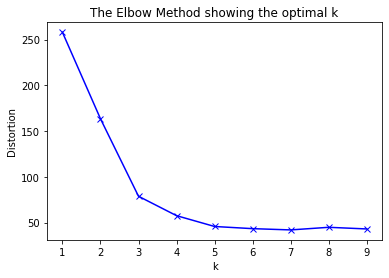

In [226]:
# Evaluate the best k value
from scipy.spatial.distance import cdist

distortions = []
Sum_of_squared_distances = []
K = range(1,10)
# Get normalized dataframe and drop the column containing the Municipality names
normalized_attica_grouped_clustering = normalized_attica_grouped.drop('Municipality', 1)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=30, max_iter = 600, random_state=53, algorithm='full').fit(normalized_attica_grouped_clustering)
    distortions.append(np.average(np.min(cdist(normalized_attica_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)))
    Sum_of_squared_distances.append(kmeanModel.inertia_)
        
#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

K Value of 4 was chosen because it seems it seems a good fit according to the elbow diagram

In [227]:
# set number of clusters
kclusters = 4

# run k-means clustering. For the sake of reproducibility, a random state has been chosen for both determining k-value and performing k-means analysis
kmeans = KMeans(n_clusters=kclusters,n_init=30, max_iter = 600, random_state=53, algorithm='full').fit(normalized_attica_grouped_clustering)
kmeans

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=4, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=53, tol=0.0001, verbose=0)

In [228]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 1, 1])

In [229]:
# Uncomment when running the analysis multiple times if "Cluster Labels already exists" error rises
municipalities_venues_sorted.drop('Cluster Labels', 1, inplace=True)

# add clustering labels
municipalities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

attica_merged = mun_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
attica_merged = attica_merged.join(municipalities_venues_sorted.set_index('Municipality'), on='Municipality', how='right')

attica_merged.head()

Municipality   Latitude  Longitude  Cluster Labels  \
0                  Acharnes  38.083333  23.733333               2   
1            Agia Paraskevi  38.011667  23.820000               1   
2              Agia Varvara  38.000000  23.650000               2   
3  Agioi Anargyroi-Kamatero  38.033333  23.716667               2   
4           Agios Dimitrios  37.933333  23.733333               2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                  Café                 Plaza           Supermarket   
1                  Café      Greek Restaurant           Coffee Shop   
2      Greek Restaurant                  Café          Dessert Shop   
3                  Café      Greek Restaurant           Coffee Shop   
4                Bakery                  Café           Coffee Shop   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0     Mobile Phone Shop                Bakery       Meze Restaurant   
1                Bakery           Supermarket                   Bar   
2                 Plaza           Supermarket               Taverna   
3                 Plaza       Meze Restaurant          Burger Joint   
4           Supermarket           Snack Place      Greek Restaurant   

     7th Most Common Venue 8th Most Common Venue   9th Most Common Venue  \
0                      Gym           Coffee Shop           Souvlaki Shop   
1        Electronics Store                 Plaza            Dessert Shop   
2                     Park                Bakery             Snack Place   
3                 Bus Stop                   Bar       Mobile Phone Shop   
4  Grilled Meat Restaurant        Lingerie Store  Furniture / Home Store   

    10th Most Common Venue  
0                  Stadium  
1              Yoga Studio  
2  Grilled Meat Restaurant  
3              Supermarket  
4           Ice Cream Shop

Now lets visualise the clusters created in a map to get a gist of what's happening

In [290]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(attica_merged['Latitude'], attica_merged['Longitude'], attica_merged['Municipality'], attica_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Lets take a closer look on the individual clusters created

<h3>Cluster 1</h3>

In [232]:
clus_1 = attica_merged.loc[attica_merged['Cluster Labels'] == 0]
clus_1

Municipality  Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
23    Kallithea     37.95       23.7               0                  Café   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
23           Coffee Shop      Greek Restaurant          Dessert Shop   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
23                Bakery           Snack Place                 Plaza   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
23           Supermarket                   Gym         Cosmetics Shop

<h3>Cluster 2</h3>

In [233]:
clus_2 = attica_merged.loc[attica_merged['Cluster Labels'] == 1]
clus_2

Municipality   Latitude  Longitude  Cluster Labels  \
1    Agia Paraskevi  38.011667  23.820000               1   
6            Alimos  37.916667  23.716667               1   
8         Chalandri  38.016667  23.800000               1   
9     Dafni-Ymittos  37.950000  23.716667               1   
17          Glyfada  37.866667  23.750000               1   
25         Kifissia  38.083333  23.816667               1   
29  Lykovrysi-Pefki  38.066667  23.800000               1   
37       Nea Smyrni  37.950000  23.716667               1   
48          Piraeus  37.939000  23.641500               1   
54          Vyronas  37.961667  23.753333               1   
55         Zografou  37.978333  23.771667               1   
56           Athina  37.983333  23.733333               1   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
1                   Café      Greek Restaurant           Coffee Shop   
6            Supermarket                  Café           Coffee Shop   
8                    Bar                  Café          Dessert Shop   
9                   Café                   Gym                Bakery   
17          Dessert Shop    Italian Restaurant          Gourmet Shop   
25                  Café          Dessert Shop    Seafood Restaurant   
29                  Café                Bakery            Restaurant   
37                  Café                   Gym                Bakery   
48                   Bar                  Café           Coffee Shop   
54                  Café                   Bar         Souvlaki Shop   
55                  Café           Coffee Shop         Souvlaki Shop   
56                   Bar                  Café          Cocktail Bar   

      4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
1                    Bakery           Supermarket                   Bar   
6   Grilled Meat Restaurant             Beach Bar  Gym / Fitness Center   
8      Gym / Fitness Center      Greek Restaurant           Supermarket   
9               Coffee Shop        Ice Cream Shop          Dessert Shop   
17           Clothing Store          Cocktail Bar                Bakery   
25                   Bakery      Sushi Restaurant           Coffee Shop   
29            Souvlaki Shop          Dessert Shop          Tennis Court   
37              Coffee Shop        Ice Cream Shop          Dessert Shop   
48              Snack Place        Ice Cream Shop            Restaurant   
54             Cocktail Bar                 Plaza                Bakery   
55         Greek Restaurant                   Bar           Pizza Place   
56              Coffee Shop          Dessert Shop         Historic Site   

   7th Most Common Venue   8th Most Common Venue    9th Most Common Venue  \
1      Electronics Store                   Plaza             Dessert Shop   
6       Greek Restaurant                  Bakery         Asian Restaurant   
8     Italian Restaurant          Ice Cream Shop             Cocktail Bar   
9         Cosmetics Shop        Greek Restaurant  Grilled Meat Restaurant   
17        Ice Cream Shop              Restaurant              Coffee Shop   
25                 Hotel            Cocktail Bar       Italian Restaurant   
29                Office  Furniture / Home Store         Greek Restaurant   
37        Cosmetics Shop        Greek Restaurant  Grilled Meat Restaurant   
48         Souvlaki Shop            Cocktail Bar             Dessert Shop   
54          Dessert Shop             Coffee Shop          Meze Restaurant   
55  Gym / Fitness Center                     Gym                   Bakery   
56      Greek Restaurant         Meze Restaurant                Bookstore   

   10th Most Common Venue  
1             Yoga Studio  
6              Donut Shop  
8             Coffee Shop  
9                     Bar  
17                  Plaza  
25          Jewelry Store  
29            Supermarket  
37                    Bar  
48           Burger Joint  
54       Greek Res

<h3>Cluster 3</h3>

In [234]:
clus_3 = attica_merged.loc[attica_merged['Cluster Labels'] == 2]
clus_3

Municipality   Latitude  Longitude  Cluster Labels  \
0                      Acharnes  38.083333  23.733333               2   
2                  Agia Varvara  38.000000  23.650000               2   
3      Agioi Anargyroi-Kamatero  38.033333  23.716667               2   
4               Agios Dimitrios  37.933333  23.733333               2   
5                       Aigaleo  37.988500  23.673500               2   
7                   Aspropyrgos  38.066667  23.583333               2   
10             Dionysos, Greece  38.100000  23.866667               2   
11                      Eleusis  38.033333  23.533333               2   
12         Elliniko-Argyroupoli  37.900000  23.750000               2   
13       Filadelfeia-Chalkidona  38.033333  23.700000               2   
14            Filothei-Psychiko  38.016667  23.766667               2   
15                         Fyli  38.100000  23.666667               2   
16                      Galatsi  38.016667  23.750000               2   
18                      Haidari  38.016667  23.650000               2   
19                Ilion, Greece  38.033333  23.700000               2   
20                    Ilioupoli  37.933333  23.750000               2   
21             Irakleio, Attica  38.050000  23.766667               2   
22                   Kaisariani  37.968333  23.758333               2   
24         Keratsini-Drapetsona  37.966667  23.616667               2   
26                   Korydallos  37.983333  23.650000               2   
27                       Kropia  37.900000  23.866667               2   
28                   Lavreotiki  37.716667  24.066667               2   
30              Mandra-Eidyllia  38.066667  23.483333               2   
31         Markopoulo Mesogaias  37.883333  23.933333               2   
32                      Marousi  38.050000  23.800000               2   
33                       Megara  37.991167  23.340000               2   
34                  Metamorfosi  38.050000  23.750000               2   
35              Moschato-Tavros  37.900000  23.750000               2   
36                    Nea Ionia  38.033333  23.750000               2   
38  Nikaia-Agios Ioannis Rentis  37.966667  23.633333               2   
39                       Oropos  38.300000  23.750000               2   
40                      Paiania  37.950000  23.850000               2   
41                Palaio Faliro  37.933333  23.700000               2   
42                      Pallini  38.000000  23.883333               2   
43            Papagou-Cholargos  38.016667  23.766667               2   
44              Penteli, Greece  38.051500  23.867667               2   
45                       Perama  37.966667  23.566667               2   
46                    Peristeri  38.016667  23.683333               2   
47                   Petroupoli  38.033333  23.683333               2   
49               Rafina-Pikermi  38.016667  24.000000               2   
50            Saronikos, Attica  37.833333  23.916667               2   
51               Spata-Artemida  37.966667  23.916667               2   
53                    Vrilissia  38.033333  23.833333               2   

   1st Most Common Venue 2nd Most Common Venue    3rd Most Common Venue  \
0                   Café                 Plaza              Supermarket   
2       Greek Restaurant                  Café             Dessert Shop   
3                   Café      Greek Restaurant              Coffee Shop   
4                 Bakery                  Café              Coffee Shop   
5                   Café       Meze Restaurant                      Bar   
7                   Café         Souvlaki Shop                  Taverna   
10                Bakery                 Plaza         Pedestrian Plaza   
11                  Café      Greek Restaurant           Ice Cream Shop   
12                  Café                   Bar            Souvlaki Shop   
13                  Café           Coffee Shop          

<h3>Cluster 4</h3>

In [235]:
clus_4 = attica_merged.loc[attica_merged['Cluster Labels'] == 3]
clus_4

Municipality  Latitude  Longitude  Cluster Labels  \
52  Vari-Voula-Vouliagmeni     37.85      23.75               3   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
52                 Beach                 Hotel                  Café   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
52                Bakery    Seafood Restaurant             Beach Bar   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
52       Meze Restaurant           Event Space           Snack Place   

   10th Most Common Venue  
52               Bus Stop

<h3>Aggregate Table</h3>

Lets visualize all restaurant occurencies in each cluster to get a gist of which one we should point to when considering places to open the restaurant

In [269]:
# Function count restaurant occurences and return a new dataframe with counted values
def count_restaurant_occurences(top_venues_df):
    # Search values to get all restaurant occurencies
    search_values = ['restaurant','souvlaki', 'tavern', 'taverna']
    indicators = ['st', 'nd', 'rd']
    
    # create columns according to number of top venues
    columns = []
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))
    ranks = [top_venues_df[col].str.contains('|'.join(search_values), na=False, case=False) for col in columns]
    ranks_dict = {}
    for i in range(len(ranks)):
        true_counter= ranks[i].value_counts().get(True) 
        if true_counter:
            ranks_dict[ranks[i].name.replace(" Most Common Venue","")] =  true_counter 
        else:
            ranks_dict[ranks[i].name.replace(" Most Common Venue","")] =  0
    ranks_df = pd.DataFrame.from_dict(ranks_dict, orient="index")
    return ranks_df


# Function to print the bar chart for each cluster of the occurencies of restaurant like venues and their respective number of occurencies
def barchart(ranks_df):
    ax = ranks_df.plot(kind='bar', figsize=(15, 8))
    ax.set_ylim([0,19])
    ax.get_legend().remove()
    ax.set_title('Restaurant Category Rank Occurencies') # add a title to the bar chart
    ax.set_ylabel('Restaurant Occurencies') # add y-label
    ax.set_xlabel('Rank') # add x-label
    return ax

# Function to print the bar chart for each cluster of the occurencies of restaurant like venues and their respective number of occurencies in a grid
def barchartgrid(ranks_df, chart_title, custom_ax):
    custom_ax = ranks_df.plot(kind='bar', figsize=(50, 10), ax = custom_ax, fontsize=30)
    custom_ax.set_ylim([0,18])
    custom_ax.get_legend().remove()
    custom_ax.set_title(chart_title, fontsize = 48, pad = 20) # add a title to the bar chart
    custom_ax.tick_params(axis = 'x', rotation = 45)
    return custom_ax

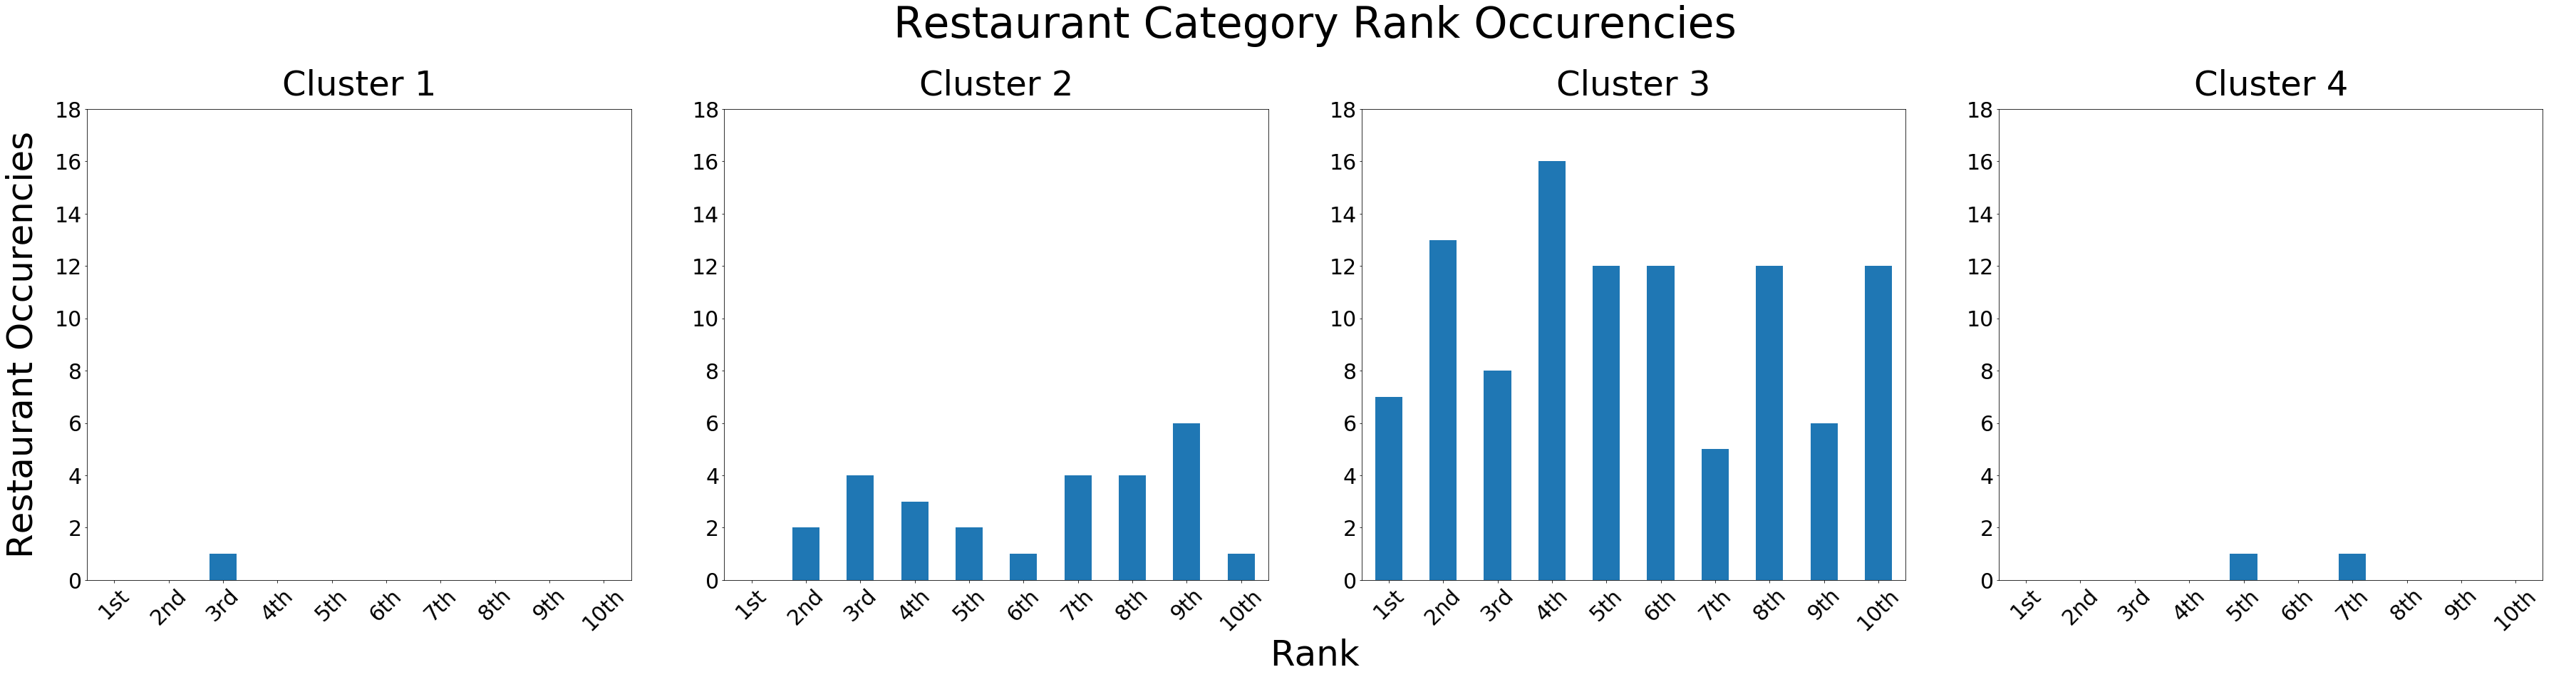

In [270]:
fig = plt.figure(figsize=(50, 50)) # create figure
ax = fig.add_subplot(1,1,1)
ax0 = fig.add_subplot(1, 4, 1) # add subplot 1 (1 row, 4 columns, first plot)
ax1 = fig.add_subplot(1, 4, 2) # add subplot 2 (1 row, 4 columns, second plot).
ax2 = fig.add_subplot(1, 4, 3) # add subplot 3 (1 row, 4 columns, third plot)
ax3 = fig.add_subplot(1, 4, 4) # add subplot 1 (1 row, 4 columns, forth plot)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['top'].set_position(('outward', 80))
ax.spines['bottom'].set_color('none')
ax.spines['bottom'].set_position(('outward', 60))
ax.spines['left'].set_color('none')
ax.spines['left'].set_position(('outward', 40))
ax.spines['right'].set_color('none')
ax.spines['right'].set_position(('outward', 40))
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_ylabel('Restaurant Occurencies', fontsize=50)
ax.set_xlabel('Rank',fontsize=50)
ax.set_title('Restaurant Category Rank Occurencies', fontsize=60, pad=100)
plt.tight_layout(pad=0, w_pad=10, h_pad=25)

ax0 = barchartgrid(count_restaurant_occurences(clus_1), "Cluster 1", ax0)
ax1 = barchartgrid(count_restaurant_occurences(clus_2), "Cluster 2", ax1)
ax2 = barchartgrid(count_restaurant_occurences(clus_3), "Cluster 3", ax2)
ax3 = barchartgrid(count_restaurant_occurences(clus_4), "Cluster 4", ax3)


plt.show()

<h4>Results</h4>

As we can see two clusters contain the majority of Municipalities (Cluster 2 and Cluster 3). Therefore it is expected to have more restaurants as there are more municipalities in these clusters. However we can see that cluster 3 has more occurencies that are ranked higher. So we suggest that Municipalities in Cluster 3 can be considered as a place to open the restauran.

**Please note that rerunning the analysis may provide different numbering for clusters. So the above conclusion should be adjusted to the new numbering order**
<hr>

<h2 align='center'>Property Pricing in Attica Municipalities<a id='property_pricing'></a></h2>

Next we wanted to estimate the Property Rent and Sale prices in these Municipalities. We used the SPI (Spitogatos Properti Index) provided by [spitogatos.gr](https://en.spitogatos.gr), the leading property website in Greece. The data provided is the average prices for the Q1 of 2020 for renting and for buying a property according to their property listings

Spitogatos does not currently providing an open API, so the information was obtained using web-scrapping techniques.  

**You can use the already downloaded data by skipping the web scraping stage, through [_here_](#analyze_property_pricing_data)**

<h4>Web scapping spitogatos.gr</h4>

In [238]:
# specify which URL/web page we are going to be scraping
url = "https://en.spitogatos.gr/property-index"

In [239]:
# open the url using urllib.request and put the HTML into the page variable
# Faking a real user headers because server raised an HTTP 405 Error
req = rqst.Request(
    url, 
    data=None, 
    headers={
        'Host': 'en.spitogatos.gr',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:75.0) Gecko/20100101 Firefox/75.0',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        'Accept-Language': 'en-US,en;q=0.5',
        'Accept-Encoding': 'gzip, deflate, br',
        'DNT': '1',
        'Connection': 'keep-alive'
#        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
   }
)
list_page = rqst.urlopen(req)

In [240]:
# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BSoup(list_page, "lxml")

In [241]:
# Get the title of the webpage as a string
soup.title.string

'Greek property sale and rent prices per area | Spitogatos'

In [242]:
# Function to perform web scrapping to spitogatos website to get property values from two identical tables (sale and rent)
def spitogatos_scrap(div_id):
    sales_table = soup.find(id=div_id).find("table")
    property_price_list = []
    table_head_columns = sales_table.find('thead').findAll('th')
    sales_rows = sales_table.find('tbody').findAll('tr')
    column_names = []
    for col in table_head_columns:
        column_names.append(col.getText())
    property_price_list.append(column_names)
    for row in sales_rows:
        current_row = []
        for cell in row.findAll('td'):
            current_row.append(cell.getText())
        property_price_list.append(current_row)

    property_price_list
    property_price_df = pd.DataFrame(property_price_list[1:],columns=property_price_list[0])
    return property_price_df

<h4>Analyze property data<a id='analyze_property_pricing_data'></a></h4>

**Choose Property data source:**<br>
1.Spitogatos.gr(if web-scraping was done)<br>
2.CSV files<br>

In [243]:
# Uncommemt to use the csv file data insteal of performing the web-scraping
# sale_price_df = pd.read_csv("./property_sale_prices.csv")
# rent_price_df = pd.read_csv("./property_rent_prices.csv")

# Get the data from spitogatos.gr
sale_price_df = spitogatos_scrap('table_sale_container')
rent_price_df = spitogatos_scrap('table_rent_container')

**Sale**

In [244]:
# Get current SALE price for different areas of Greece
print(sale_price_df.shape)
sale_price_df.head()

(63, 4)


Area Q1 2020 (€/sqm) Q1 2019 (€/sqm) Change %
0  Greece - countrywide           1,545           1,458     6.00
1       Athens - Center           1,571           1,500     4.80
2        Athens - North           2,246           2,162     3.90
3        Athens - South           2,593           2,500     3.70
4         Athens - West           1,273           1,176     8.20

**Rent**

In [245]:
# Get current RENT price for different areas of Greece
print(rent_price_df.shape)
rent_price_df.head()

(53, 4)


Area Q1 2020 (€/sqm) Q1 2019 (€/sqm) Change %
0  Greece - countrywide            7.37            6.73     9.50
1       Athens - Center            9.44            9.91    -4.70
2        Athens - North            8.39            8.00     4.90
3        Athens - South           10.59           10.71    -1.10
4         Athens - West            6.22            5.71     8.90

In [246]:
# Keep the entries that refer to Attica and for reference the country wide numbers
attica_sale_property_price_df = sale_price_df.iloc[:9]
print(attica_sale_property_price_df.shape)
attica_sale_property_price_df

(9, 4)


Area Q1 2020 (€/sqm) Q1 2019 (€/sqm) Change %
0  Greece - countrywide           1,545           1,458     6.00
1       Athens - Center           1,571           1,500     4.80
2        Athens - North           2,246           2,162     3.90
3        Athens - South           2,593           2,500     3.70
4         Athens - West           1,273           1,176     8.20
5         Athens - East           1,518           1,450     4.70
6               Piraeus           1,444           1,302    10.90
7       Piraeus suburbs           1,140           1,055     8.10
8        Rest of Attica           1,600           1,534     4.30

In [247]:
# Keep the entries that refer to Attica and for reference the country wide numbers
attica_rent_property_price_df = rent_price_df.iloc[:9]
print(attica_rent_property_price_df.shape)
attica_rent_property_price_df

(9, 4)


Area Q1 2020 (€/sqm) Q1 2019 (€/sqm) Change %
0  Greece - countrywide            7.37            6.73     9.50
1       Athens - Center            9.44            9.91    -4.70
2        Athens - North            8.39            8.00     4.90
3        Athens - South           10.59           10.71    -1.10
4         Athens - West            6.22            5.71     8.90
5         Athens - East            6.25            5.83     7.20
6               Piraeus            7.60            7.06     7.60
7       Piraeus suburbs            6.02            5.78     4.20
8        Rest of Attica            6.47            6.14     5.40

In [248]:
# Convert columns to the correct data types

attica_sale_property_price_df['Q1 2020 (€/sqm)'].replace({',':''},regex=True, inplace=True)
attica_sale_property_price_df['Q1 2019 (€/sqm)'].replace({',':''},regex=True, inplace=True)
columns = ['Q1 2020 (€/sqm)', 'Q1 2019 (€/sqm)', 'Change %']
for col in columns:
#     Warning raised SettingWithCopyWarning is not applicable here because we overwrite each column with new series
    attica_sale_property_price_df[col] = pd.to_numeric(attica_sale_property_price_df[col])
print(attica_sale_property_price_df.dtypes)
attica_sale_property_price_df

Area                object
Q1 2020 (€/sqm)      int64
Q1 2019 (€/sqm)      int64
Change %           float64
dtype: object


C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Area  Q1 2020 (€/sqm)  Q1 2019 (€/sqm)  Change %
0  Greece - countrywide             1545             1458       6.0
1       Athens - Center             1571             1500       4.8
2        Athens - North             2246             2162       3.9
3        Athens - South             2593             2500       3.7
4         Athens - West             1273             1176       8.2
5         Athens - East             1518             1450       4.7
6               Piraeus             1444             1302      10.9
7       Piraeus suburbs             1140             1055       8.1
8        Rest of Attica             1600             1534       4.3

In [249]:
# Convert columns to the correct data types
columns = ['Q1 2020 (€/sqm)', 'Q1 2019 (€/sqm)', 'Change %']
for col in columns:
#     Warning raised SettingWithCopyWarning is not applicable here because we overwrite each column with new series
    attica_rent_property_price_df[col] = pd.to_numeric(attica_rent_property_price_df[col])
print(attica_rent_property_price_df.dtypes)
attica_rent_property_price_df

Area                object
Q1 2020 (€/sqm)    float64
Q1 2019 (€/sqm)    float64
Change %           float64
dtype: object


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Area  Q1 2020 (€/sqm)  Q1 2019 (€/sqm)  Change %
0  Greece - countrywide             7.37             6.73       9.5
1       Athens - Center             9.44             9.91      -4.7
2        Athens - North             8.39             8.00       4.9
3        Athens - South            10.59            10.71      -1.1
4         Athens - West             6.22             5.71       8.9
5         Athens - East             6.25             5.83       7.2
6               Piraeus             7.60             7.06       7.6
7       Piraeus suburbs             6.02             5.78       4.2
8        Rest of Attica             6.47             6.14       5.4

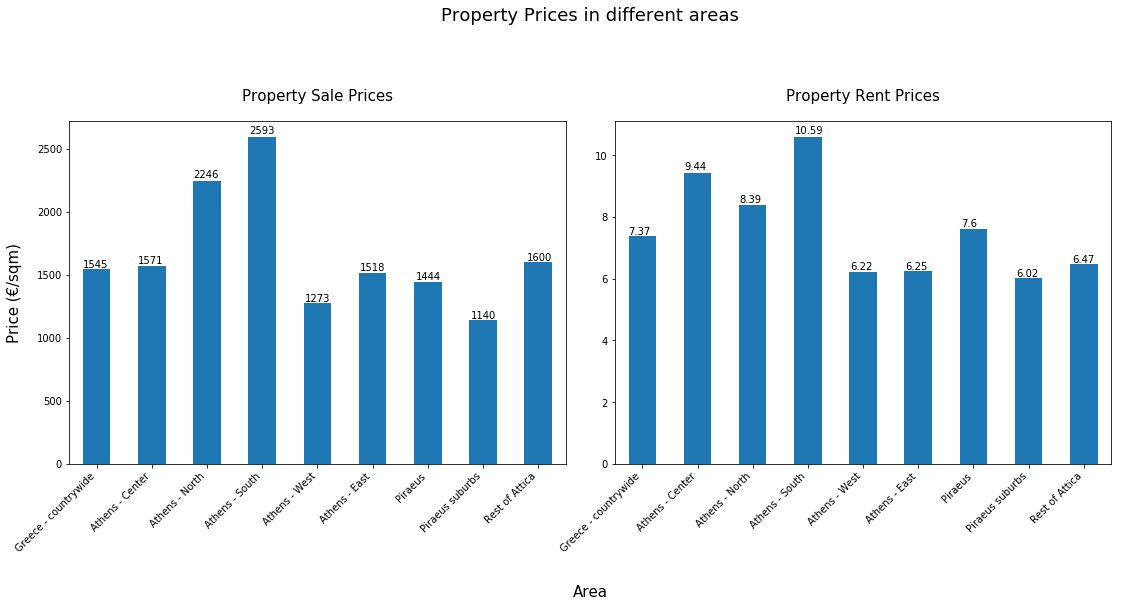

In [250]:
def barchartprices(ranks_df, chart_title, custom_ax):
    custom_ax = ranks_df.plot(kind='bar', figsize=(15, 5), x='Area', y='Q1 2020 (€/sqm)', ax = custom_ax, fontsize=10)
    custom_ax.get_legend().remove()
    custom_ax.set_title(chart_title, fontsize = 15, pad = 20) # add a title to the bar chart
    custom_ax.set_xlabel('') # add emptly x-label because the word Area is automatically inserted
    # Rotate the tick labels and set their alignment.
    custom_ax.set_xticklabels(custom_ax.get_xticklabels(), rotation = 45, ha="right")
    for p in custom_ax.patches:
        custom_ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))
    return custom_ax

fig = plt.figure(figsize=(40, 80)) # create figure
ax = fig.add_subplot(1,1,1)
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot).

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['top'].set_position(('outward', 10))
ax.spines['bottom'].set_color('none')
ax.spines['bottom'].set_position(('outward', 100))
ax.spines['left'].set_color('none')
ax.spines['left'].set_position(('outward', 20))
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_ylabel('Price (€/sqm)', fontsize=15)
ax.set_xlabel('Area',fontsize=15)
ax.set_title('Property Prices in different areas', fontsize=18, pad=100)
plt.tight_layout(pad=0, w_pad=10, h_pad=25)

ax0 = barchartprices(attica_sale_property_price_df, "Property Sale Prices", ax0)
ax1 = barchartprices(attica_rent_property_price_df, "Property Rent Prices", ax1)

<hr>

<h2 align='center'>Property Prices Visualization<a id='price_visualization'></a></h2>

Now for visualization purposes we need to get the boundaries of each municipality from a GeoJSON file. This way we can visualize the clusters and the prices as a heatmap in the same map instance

In [251]:
import json

In [252]:
with open('municipalities_greece_kallikratis.json', encoding='utf8') as json_file:
    world_geo = json.load(json_file)
type(world_geo)

dict

This GeoJSON contains all municipalities of Greece. We need to isolate only the Municipalities of Attica for use in the map

In [253]:
# Funtion to get a new dictionary file like a GeoJSON containing only specific Municipalites
def locate_mun_dict(input_json_dictionary, municipality_names_list):
    attica_mun_json = {
        'type':'FeatureCollection',
        'totalFeatures':0,
        'features': [],
        'crs': {'type': 'name', 'properties': { 'name' : 'urn:ogc:def:crs:EPSG::4326'}}
    }
    counter = 0;
    for i in range(world_geo["totalFeatures"]):
        current_position_string = world_geo["features"][i]['properties']['NAME']
        if(any(ele in current_position_string for ele in municipality_names_list)):
            attica_mun_json['features'].append(world_geo["features"][i])
            counter = counter + 1
    attica_mun_json['totalFeatures']= counter
    print('Found: ', attica_mun_json['totalFeatures'], '/', len(municipality_names_list))
    return attica_mun_json;

The financial stats we have about the properties are computed for 6 Attica areas that contain several Municipalities. We have to manually add to each area its corresponding Municipalities.

In [254]:
attica_east_areas =  ['Αχαρνών','Ζωγράφου','Βύρωνος', 'Καισαριανής', 'Παπάγου - Χολαργού', 'Παιανίας', 'Παλλήνης', 'Κρωπίας', 'Σπάτων - Αρτέμιδος','Μαραθώνος']

In [255]:
attica_north_areas =['Eκάλης', 'Νέας Ερυθραίας', 'Αγίου Στεφάνου', 'Δροσιάς', 'Διονύσου', 'Κρυονερίου', 
              'Κηφισιάς', 'Αμαρουσίου', 'Πεύκης', 'Λυκόβρυσης', 'Ηρακλείου', 'Γλυκών Νερών', 'Βριλησσίων', 
              'Μελισσίων', 'Πεντέλης', 'Χαλανδρίου', 'Αγίας Παρασκευής', 'Θρακομακεδόνων', 'Ψυχικού', 'Φιλοθέης', 'Βαρυμπόμπης']

In [256]:
attica_south_areas=[ 'Αλίμου', 'Νέας Σμύρνης', 'Αγίου Δημητρίου', 'Παλαιού Φαλήρου',
              'Γλυφάδας', 'Βούλας', 'Ελληνικού - Αργυρούπολης', 'Ηλιούπολης', 'Βουλιαγμένης', 'Δάφνη', 'Καλλιθέας']

In [257]:
attica_west_areas =['Αγίας Βαρβάρας', 'Πετρούπολης', 'Ιλίου', 'Περιστερίου', 'Αιγάλεω', 'Μεταμορφώσεως', 'Νέας Ιωνίας','Φιλαδελφείας',
             'Αγίων Αναργύρων', 'Γαλατσίου', 'Χαϊδαρίου']

In [258]:
attica_piraeus_suburbs_areas=['Μοσχάτου', 'Κορυδαλλού', 'Νίκαιας', 'Κερατσινίου', 'Περάματος']

In [259]:
attica_rest_areas=['Ραφήνας - Πικερμίου', 'Λαυρεωτικής', 'Μαρκοπούλου Μεσογαίας', 'Σαρωνικού', 'Ασπροπύργου', 'Φυλής', 'Ωρωπού', 'Μεγαρέων', 'Μάνδρας - Ειδυλλίας', 'Ελευσίνας']

In [260]:
# Function to get the Rent Rate of an area in 2020
def getRentPricePerAreaPerYear(area, year):
    if (year == 2019):
        year_column_name = 'Q1 2019 (€/sqm)'
    elif(year == 2020):
        year_column_name = 'Q1 2020 (€/sqm)'
    return attica_rent_property_price_df.loc[attica_rent_property_price_df['Area'] == area][year_column_name].values[0]

# Function to get the Sale Rate of an area in 2020
def getSalePricePerAreaPerYear(area, year):
    if (year == 2019):
        year_column_name = 'Q1 2019 (€/sqm)'
    elif(year == 2020):
        year_column_name = 'Q1 2020 (€/sqm)'
    return attica_sale_property_price_df.loc[attica_sale_property_price_df['Area'] == area][year_column_name].values[0]

In [261]:
# Create a list containing the Attica Areas and add the average RENT price of each area
attica_areas_list = []

area = 'Athens - Center'
athens_list = ['Αθηναίων', area,
               getRentPricePerAreaPerYear(area,2019), getRentPricePerAreaPerYear(area,2020),
               getSalePricePerAreaPerYear(area,2019), getSalePricePerAreaPerYear(area,2020)]
attica_areas_list.append(athens_list)

area = 'Piraeus'
piraeus_list = ['Πειραιώς', area, 
                getRentPricePerAreaPerYear(area,2019), getRentPricePerAreaPerYear(area,2020),
                getSalePricePerAreaPerYear(area,2019),getSalePricePerAreaPerYear(area,2020)]
attica_areas_list.append(piraeus_list)

attica_east = []
for x in range(len(attica_east_areas)):
    area = "Athens - East"
    attica_east.append([attica_east_areas[x], area, 
                        getRentPricePerAreaPerYear(area,2019), getRentPricePerAreaPerYear(area,2020),
                       getSalePricePerAreaPerYear(area,2019),getSalePricePerAreaPerYear(area,2020)])
attica_areas_list.extend(attica_east)

attica_west = []
for x in range(len(attica_west_areas)):
    area = "Athens - West"
    attica_west.append([attica_west_areas[x], area, 
                        getRentPricePerAreaPerYear(area,2019), getRentPricePerAreaPerYear(area,2020),
                        getSalePricePerAreaPerYear(area,2019),getSalePricePerAreaPerYear(area,2020)])
attica_areas_list.extend(attica_west)

attica_north = []
for x in range(len(attica_north_areas)):
    area = "Athens - North"
    attica_north.append([attica_north_areas[x], area, 
                        getRentPricePerAreaPerYear(area,2019), getRentPricePerAreaPerYear(area,2020),
                        getSalePricePerAreaPerYear(area,2019),getSalePricePerAreaPerYear(area,2020)])
attica_areas_list.extend(attica_north)

attica_south = []
for x in range(len(attica_south_areas)):
    area = "Athens - South"
    attica_south.append([attica_south_areas[x], area,
                         getRentPricePerAreaPerYear(area,2019), getRentPricePerAreaPerYear(area,2020),
                         getSalePricePerAreaPerYear(area,2019),getSalePricePerAreaPerYear(area,2020)])
attica_areas_list.extend(attica_south)

attica_piraeus_suburbs = []
for x in range(len(attica_piraeus_suburbs_areas)):
    area = "Piraeus suburbs"
    attica_piraeus_suburbs.append([attica_piraeus_suburbs_areas[x], area, 
                                   getRentPricePerAreaPerYear(area,2019), getRentPricePerAreaPerYear(area,2020),
                                  getSalePricePerAreaPerYear(area,2019),getSalePricePerAreaPerYear(area,2020)])
attica_areas_list.extend(attica_piraeus_suburbs)

attica_rest = []
for x in range(len(attica_rest_areas)):
    area = "Rest of Attica"
    attica_rest.append([attica_rest_areas[x], area,
                        getRentPricePerAreaPerYear(area,2019), getRentPricePerAreaPerYear(area,2020),
                       getSalePricePerAreaPerYear(area,2019),getSalePricePerAreaPerYear(area,2020)])
attica_areas_list.extend(attica_rest)

# Get dataframe from list of all Attica areas with rent average values
attica_property_prices_df = pd.DataFrame(attica_areas_list, columns= ['Municipality', 'Region', 'Rent Q1 2019', 'Rent Q1 2020','Sale Q1 2019', 'Sale Q1 2020'])
print(attica_property_prices_df.shape)
attica_property_prices_df.head()

(70, 6)


Municipality           Region  Rent Q1 2019  Rent Q1 2020  Sale Q1 2019  \
0     Αθηναίων  Athens - Center          9.91          9.44          1500   
1     Πειραιώς          Piraeus          7.06          7.60          1302   
2      Αχαρνών    Athens - East          5.83          6.25          1450   
3     Ζωγράφου    Athens - East          5.83          6.25          1450   
4      Βύρωνος    Athens - East          5.83          6.25          1450   

   Sale Q1 2020  
0          1571  
1          1444  
2          1518  
3          1518  
4          1518

In [262]:
# Get a dictionary with Coordinates with only the municipalities we are interested in Attica
attica_municipalities_needed = attica_property_prices_df['Municipality'].tolist()
attica_dict = locate_mun_dict(world_geo, attica_municipalities_needed)

# Delete municipality with same name as the one in Attica but located in Crete
municipality_to_delete_index = -1
for i in range(attica_dict["totalFeatures"]):
    if(attica_dict["features"][i]['properties']['KWD_YPES'] == '9305'):
        municipality_to_delete_index = i
if(municipality_to_delete_index > -1):
    attica_dict["features"].pop(municipality_to_delete_index)
    attica_dict["totalFeatures"] = attica_dict["totalFeatures"] - 1

Found:  59 / 70


Now that we have our data correctly structured, we will visualize the cluster data and the property price data together in the same map. We therefore create two maps, one for prices regarding rent and another regarding sales.

In [292]:

# create a plain map
attica_rent_map = folium.Map(location=[37.983972, 23.727806], zoom_start=10, tiles='OpenStreetMap')
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
attica_rent_map.choropleth(
    geo_data=attica_dict,
    data=attica_property_prices_df,
    columns=['Municipality', 'Rent Q1 2020'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.8, 
    line_opacity=0.2,
    legend_name='Rent Prices in Attica (Euros/sqm)'
)
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(attica_merged['Latitude'], attica_merged['Longitude'], attica_merged['Municipality'], attica_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(attica_rent_map)

In [291]:

# create a plain map
attica_sale_map = folium.Map(location=[37.983972, 23.727806], zoom_start=10, tiles='OpenStreetMap')
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
attica_sale_map.choropleth(
    geo_data=attica_dict,
    data=attica_property_prices_df,
    columns=['Municipality', 'Sale Q1 2020'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.8, 
    line_opacity=0.2,
    legend_name='Sale Prices in Attica (Euros/sqm)'
)
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(attica_merged['Latitude'], attica_merged['Longitude'], attica_merged['Municipality'], attica_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(attica_sale_map)

In [293]:
# display map
attica_rent_map

In [294]:
# display map
attica_sale_map

<h2 align='center'>Discussion<a id='discussion'></a></h2>

The segmentation of a big and crowded Greek region such as Attica can provide many challenges. The choice of the segmantation process and algorithm could potentialy yield very different results. Also the information source can have a great impact on that too. The use of k-means algorithm provide some quick results that can give a good impression of the place. However, being a heuristic algorithm can converge to a local minimum instead of a global one, losing the "bigger picture" and skewing the results. Also the use of the Foursquare API may limit the results to certain venues that local people feel more comfortable reporting on.

There are certainly limitations to this analysis that may or may not be overcome with different data sources and/or processing algorithms. However we can get a descriptive snapshot of the different Municipalities and their venues that certainly give us plentiful of information. We can draw several conclusion about the real estate status and the different venues in each municipality.

There are also future prospects for this analysis, that could include broader datasources regarding the venues and a more detailed real estate pricing status for each municipality. After picking the desired municipalities, we could proceed analyzing the respective Neighbourhoods in order to pinpoint the exact location for the new restaurant. Also some other factors must be taken into consideration, such as the type of restarant, whether the property will be bought or renter as well as the target group and cuisine.